# Linear Regression
## Hypothesis
$$ h_{\theta}(x_i) = \theta_0 + \theta_1 x_i $$
## Cost Function
$$ J(\theta) = \frac{1}{2 m} \sum_{i=1}^{m} ( h_{\theta}(x_i) - y_i)^2 $$

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Importing Data
Data is in ex1data1.txt file
First column is population of a city
Second Column is the profit of a food truck in that city

In [3]:
data = pd.read_csv('Practice\Machine Learning\machine-learning-ex1\machine-learning-ex1\ex1\ex1data1.txt', sep = ',', header=None)
data.columns = ["Population of city", "Profit of a food truck"]
data.head()

,Population of city,Profit of a food truck
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
x = data["Population of city"]
y = data["Profit of a food truck"]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit of a food truck, dtype: float64

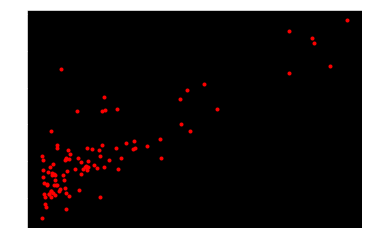

In [5]:
plt.plot(x, y, 'r.')
plt.show()

## Prepare features, outcome and theta matrix
### Insert A column of 1's in input
$ Y = \begin{bmatrix} y_1 \newline y_2 \newline y_3 \newline ... \newline y_m \newline \end{bmatrix}$
$ X = \begin{bmatrix} 1 & x_1 \newline 1 & x_2 \newline 1 & x_3 \newline ... & ... \newline 1 & x_m \newline \end{bmatrix}$
$ \theta = \begin{bmatrix} \theta_0 \newline \theta_1 \end{bmatrix}$

Then,
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (X \theta - Y)^T (X \theta - Y) $$

In [6]:
X = pd.DataFrame(x)
X.insert(0, "x_0", 1.0)
X.head()

,x_0,Population of city
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


In [7]:
theta = pd.DataFrame({"theta": [0.0, 0.0]})
theta.head()

,theta
0,0.0
1,0.0


In [8]:
X = np.array(X)
y = np.array(y)
theta = np.array(theta)

In [9]:
# np.subtract(np.dot(X, theta), Y)
it = 1500
alpha = 0.01

In [10]:
def computeCost(X, y, theta):
    m = y.size
    return 1/(2*m) * np.sum( np.power( np.dot(X, theta) - y, 2 ) )

In [11]:
# Testing Cost function
theta = np.array([0, 0.5])
print(computeCost(X, y, theta))
theta = np.array([0.0, 0.0])

9.583801857435052


## Finding vector $ \theta $
---
### Analytical Method
![Analytical Solution](https://miro.medium.com/max/343/1*KgOIGsHIU4PlLw6CP1gOBA.png)

Using Normal Equation
$  \theta = (X^T  X)^{-1} X^T y $
```python
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
```

In [12]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
computeCost(X, y, theta)

4.476971375975179

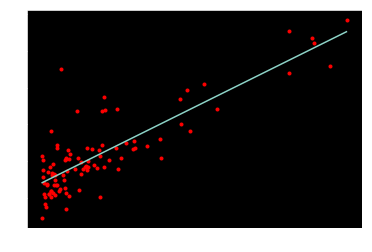

In [13]:
plt.plot(X[:, [1]], y, 'r.')
x = np.arange(X[:, [1]].min(), X.max(), 0.01)
plt.plot(x, theta[0] + theta[1]*x)
plt.show()

## Using Gradient Descent
$ \text{repeat until convergence: update} $ 
$$ \theta_j : \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$

### Gradient Descent for Linear Regression

$$ \theta_j : \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h^i_{\theta}(x) - y^i)X^i_j  $$

$ \alpha $ is the size of the step taken by the Gradient Descent algorithm

> Why and when to use Gradient Descent instead of Normal Equation
Normal Equation is slow for m > 1000 as it has complexity $ \Theta(m^3) $

In [14]:
def grad_desc(X, y, theta, iter=200, alpha=0.01):
    m = y.size
    cost_history = np.zeros(iter)
    theta_history = np.zeros((iter, 2))
    for it in range(iter):
        theta = theta - alpha/m * X.T.dot((X.dot(theta)-y))
        theta_history[it, :] = theta.T
        cost_history[it] = computeCost(X, y, theta)
    return theta, theta_history, cost_history

In [15]:
theta = np.array([0, 0])
theta, thetas, costs = grad_desc(X, y, theta, iter= 500, alpha=0.01)
print("Cost:", computeCost(X, y, theta))
theta

Cost: 4.713809531116866


array([-2.28286727,  1.03099898])

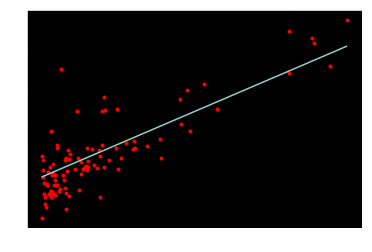

In [16]:
plt.plot(X[:, [1]], y, 'r.')
plt.plot(x, theta[0] + theta[1]*x)
plt.show()

## Learning Curve

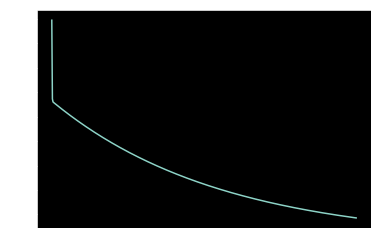

In [17]:
plt.plot(np.arange(0, 500, 1), costs)
plt.show()

(2,)


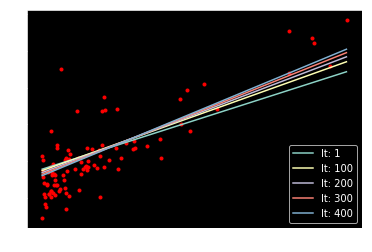

In [18]:

plt.plot(X[:, [1]], y, 'r.')
print(theta.shape)
plt.plot(x, thetas[1][0] + thetas[1][1]*x, label='It: 1')
plt.plot(x, thetas[100][0] + thetas[100][1]*x, label='It: 100')
plt.plot(x, thetas[200][0] + thetas[200][1]*x, label='It: 200')
plt.plot(x, thetas[300][0] + thetas[300][1]*x, label='It: 300')
plt.plot(x, thetas[400][0] + thetas[400][1]*x, label='It: 400')
plt.legend()
plt.show()

## Plotting Cost function vs theta

In [19]:
J_vals = np.zeros((40, 40))
theta1 = np.linspace(-3, 2, 40)
theta2 = np.linspace(0, 1.6, 40)
theta1, theta2 = np.meshgrid(theta1, theta2)
for i in range(40):
    for j in range(40):
        J_vals[i][j] = computeCost(X, y, np.array( [theta1[i][j], theta2[i][j] ] ))

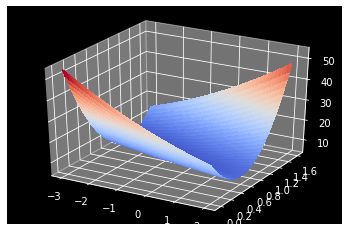

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta1, theta2, J_vals, cmap=cm.coolwarm,linewidth=0, antialiased=False)

plt.show()
